# How to run pre-trained caffe model on Local Machine

Supposed that you trained your network using Nvidia Digits or if you downloaded the model form Caffe Zoo. This tutorial would help you to run or test the model locally.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Set the path of your caffe model. If your caffe installation is corerct then you should not get error at import caffe at this stage. If you get an error here please confirm that you have executed make pycaffe after intsalling caffe.

In [2]:
caffe_root = '/home/bhushan/caffe-master/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Make sure you have following files ready before executing the code
* mean image i.e. mean.binaryproto
* Pretrained weights i.e. .caffemodel file
* depoly.prototext file

## Loading the mean image

In [4]:
mean_filename='./mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

## Loading the pretrained network

In [5]:
net_pretrained='./dolphin.caffemodel'
net_model_file='./deploy.prototxt'
net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(1, 3, 227, 227)


/home/bhushan/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


## Labels

Provide labels of your classifier. In this tutorial, I have used a model which classifies Dolphin or Seahorse. So my labes are as shown below.

In [6]:
labels_list=['Dolphin','Seahorse']

## Reading and plotting the input image

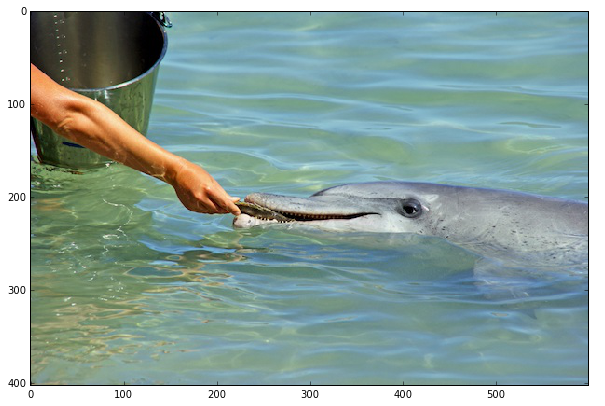

In [10]:
example_image = 'Test1.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

## Model prediction

In [11]:
prediction = net.predict([input_image]) 

print 'predicted class:', labels_list[prediction[0].argmax()]

predicted class: Dolphin
